In [4]:
import os
import cv2
import numpy as np
from skimage import morphology, util
import matplotlib.pyplot as plt


In [5]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
xray_images_dir = '/content/drive/MyDrive/clean_images'

In [17]:
def preprocess_xray2(image_path):
    try:

        xray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


        if xray_image is None:
            raise ValueError("Image not loaded properly")


        standard_size = (256, 256)
        xray_image = cv2.resize(xray_image, standard_size)


        blurred_image = cv2.GaussianBlur(xray_image, (5, 5), 0)


        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        contrast_enhanced_image = clahe.apply(blurred_image)



        return contrast_enhanced_image
    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")
        return None


In [34]:

def apply_histogram_equalization(image):
    equalized_image = cv2.equalizeHist(image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast_enhanced_image = clahe.apply(image)
    return equalized_image


def apply_bilateral_filter(image, diameter=9, sigma_color=75, sigma_space=75):
    bilateral_filtered_image = cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)
    return bilateral_filtered_image


def preprocess_xray(image_path):
    try:

        xray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if xray_image is None:
            raise ValueError("Image not loaded properly")


        standard_size = (256, 256)
        xray_image = cv2.resize(xray_image, standard_size)

        blurred_image = cv2.GaussianBlur(xray_image, (5, 5), 0)
        equalized_image = apply_histogram_equalization(blurred_image)


        #bilateral_filtered_image = apply_bilateral_filter(xray_image)


        return equalized_image
    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")
        return None


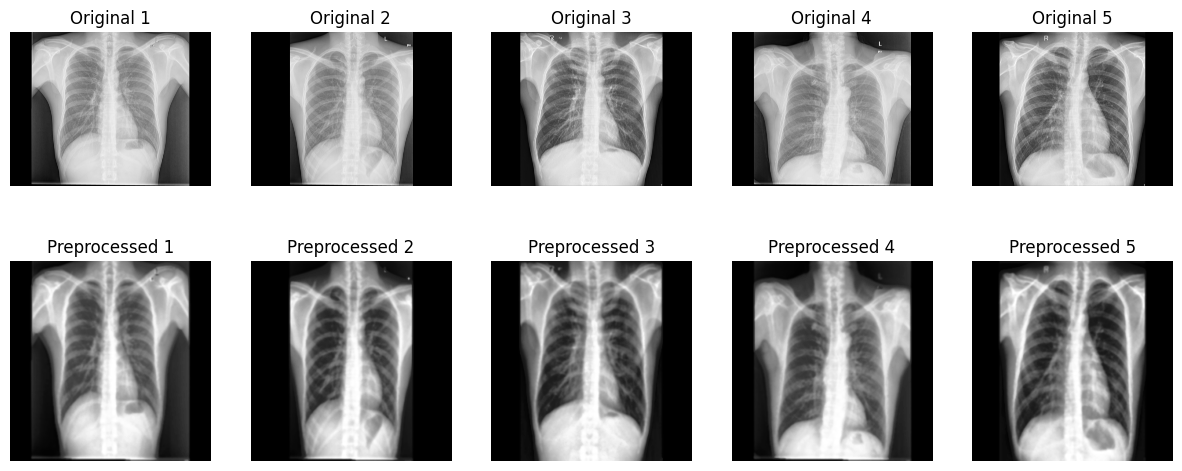

In [35]:
preprocessed_images = []
original_images = []
for i, image_name in enumerate(os.listdir(xray_images_dir)):
    if i >= 5:
        break

    image_path = os.path.join(xray_images_dir, image_name)

    original_images.append(plt.imread(image_path))

    preprocessed_image = preprocess_xray(image_path)

    if preprocessed_image is not None:
        preprocessed_images.append(preprocessed_image)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))


for i in range(5):
    axs[0, i].imshow(original_images[i], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Original {i + 1}')


for i in range(5):
    axs[1, i].imshow(preprocessed_images[i], cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f'Preprocessed {i + 1}')

plt.show()

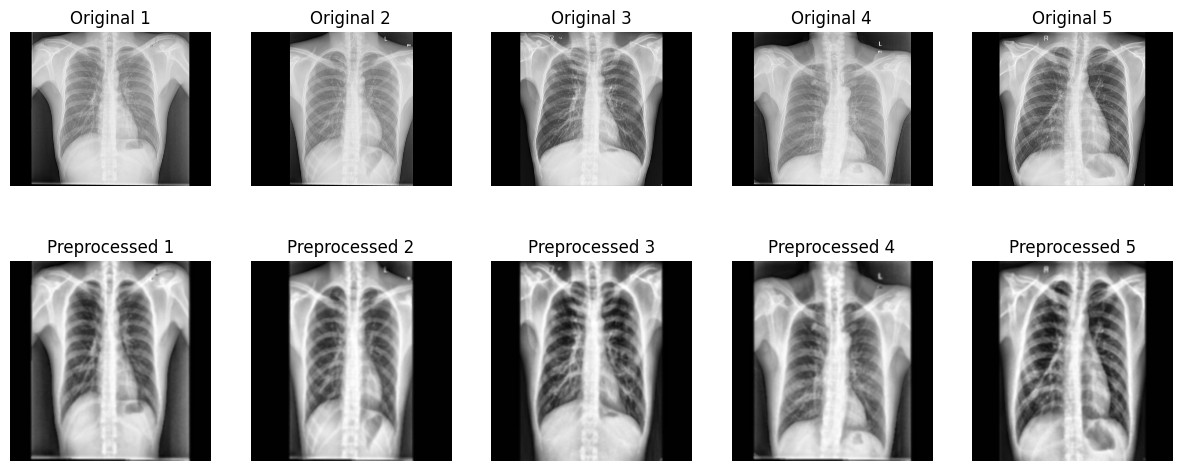

In [18]:
preprocessed_images = []
original_images = []
for i, image_name in enumerate(os.listdir(xray_images_dir)):
    if i >= 5:
        break

    image_path = os.path.join(xray_images_dir, image_name)

    original_images.append(plt.imread(image_path))

    preprocessed_image = preprocess_xray2(image_path)

    if preprocessed_image is not None:
        preprocessed_images.append(preprocessed_image)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))


for i in range(5):
    axs[0, i].imshow(original_images[i], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Original {i + 1}')


for i in range(5):
    axs[1, i].imshow(preprocessed_images[i], cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f'Preprocessed {i + 1}')

plt.show()

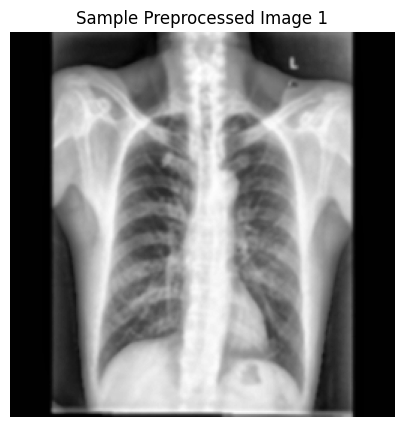

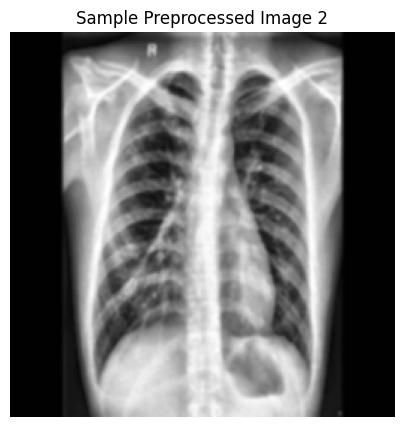

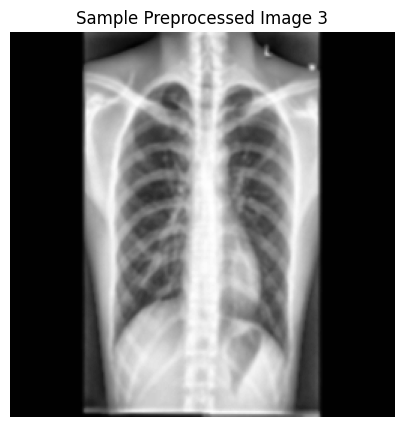

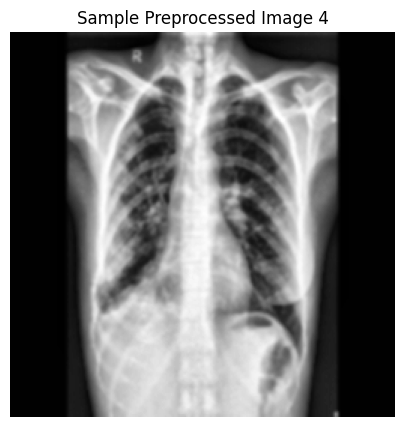

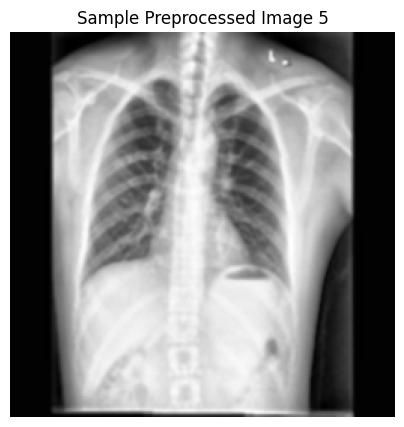

In [ ]:
preprocessed_images = []


for image_name in os.listdir(xray_images_dir):
    image_path = os.path.join(xray_images_dir, image_name)


    preprocessed_image = preprocess_xray(image_path)
    if preprocessed_image is not None:
        preprocessed_images.append(preprocessed_image)

for i, img in enumerate(preprocessed_images[:5]):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(f"Sample Preprocessed Image {i+1}")
    plt.axis('off')
    plt.show()

In [29]:
# Function to apply Sobel Edge Detection
def apply_sobel(image, ksize=3):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    sobel = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return sobel

# Function to apply Canny Edge Detection
def apply_canny(image, threshold1=50, threshold2=150):
    canny = cv2.Canny(image, threshold1, threshold2)
    return canny

# Function to apply Laplacian of Gaussian (LoG)
def apply_log(image, ksize=3, sigma=0):
    blurred_image = cv2.GaussianBlur(image, (ksize, ksize), sigma)
    log = cv2.Laplacian(blurred_image, cv2.CV_64F)
    return log

# Function to apply Hough Transform for linear features
def apply_hough_transform(image, threshold=50, min_line_length=100, max_line_gap=10):
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return line_image

# Example of preprocessing function that applies each edge detection technique to the original image
def preprocess_xray3(image_path):
    try:
        # Load the image in grayscale
        xray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if xray_image is None:
            raise ValueError("Image not loaded properly")

        # Resize the image to a standard size
        standard_size = (256, 256)
        xray_image = cv2.resize(xray_image, standard_size)

        # Apply each edge detection technique to the resized original image
        sobel_image = apply_sobel(xray_image)
        canny_image = apply_canny(xray_image)
        log_image = apply_log(xray_image)
        hough_image = apply_hough_transform(xray_image)

        # Return the separately processed images
        return sobel_image #sobel_image , canny_image, log_image, hough_image
    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")
        return None, None, None, None

# To use this function, replace 'path_to_your_xray_image.png' with your image path.
# sobel, canny, log, hough = preprocess_xray('path_to_your_xray_image.png')

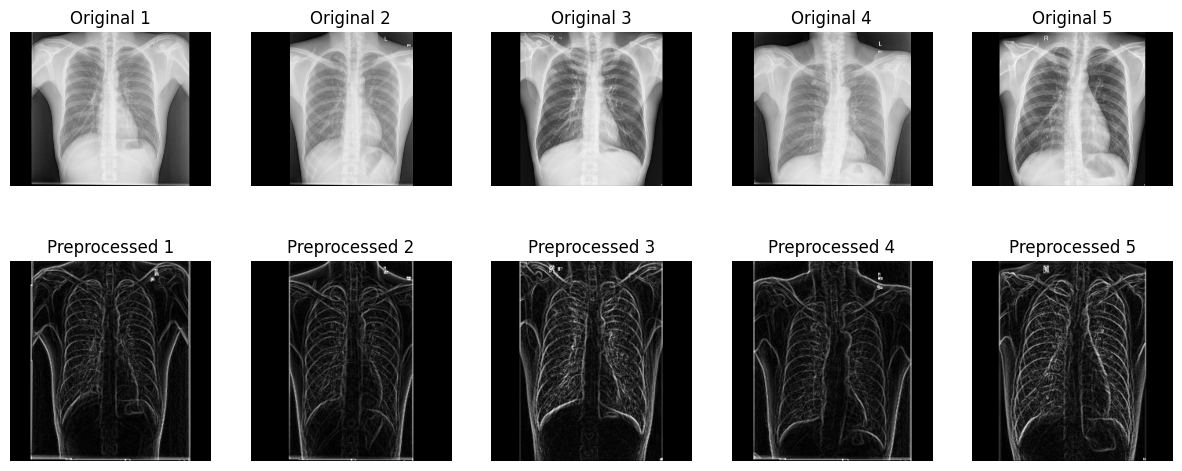

In [30]:
preprocessed_images = []
original_images = []
for i, image_name in enumerate(os.listdir(xray_images_dir)):
    if i >= 5:
        break

    image_path = os.path.join(xray_images_dir, image_name)

    original_images.append(plt.imread(image_path))

    preprocessed_image = preprocess_xray3(image_path)

    if preprocessed_image is not None:
        preprocessed_images.append(preprocessed_image)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))


for i in range(5):
    axs[0, i].imshow(original_images[i], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Original {i + 1}')


for i in range(5):
    axs[1, i].imshow(preprocessed_images[i], cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f'Preprocessed {i + 1}')

plt.show()

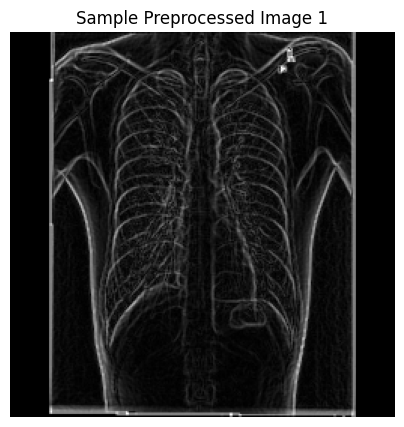

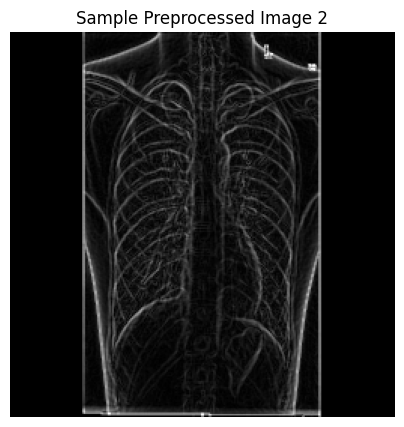

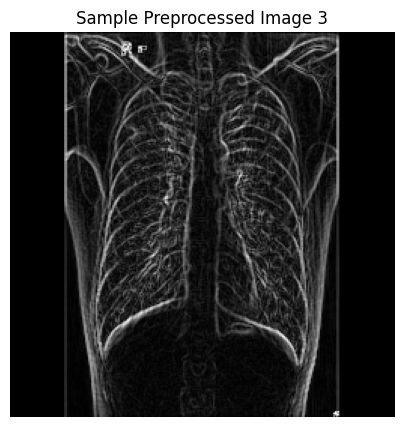

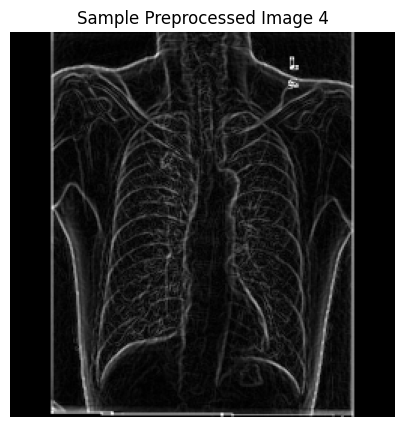

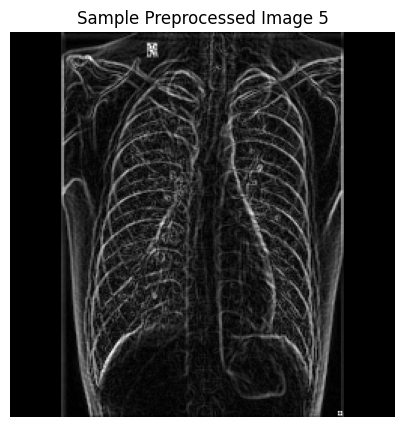

In [32]:
preprocessed_images = []


for image_name in os.listdir(xray_images_dir):
    image_path = os.path.join(xray_images_dir, image_name)


    preprocessed_image = preprocess_xray3(image_path)
    if preprocessed_image is not None:
        preprocessed_images.append(preprocessed_image)

for i, img in enumerate(preprocessed_images[:5]):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(f"Sample Preprocessed Image {i+1}")
    plt.axis('off')
    plt.show()

In [25]:
def preprocess_xray4(image_path):
    try:

        xray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


        if xray_image is None:
            raise ValueError("Image not loaded properly")


        standard_size = (256, 256)
        xray_image = cv2.resize(xray_image, standard_size)


        blurred_image = cv2.GaussianBlur(xray_image, (5, 5), 0)


        #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        #contrast_enhanced_image = clahe.apply(blurred_image)



        return blurred_image
    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")
        return None

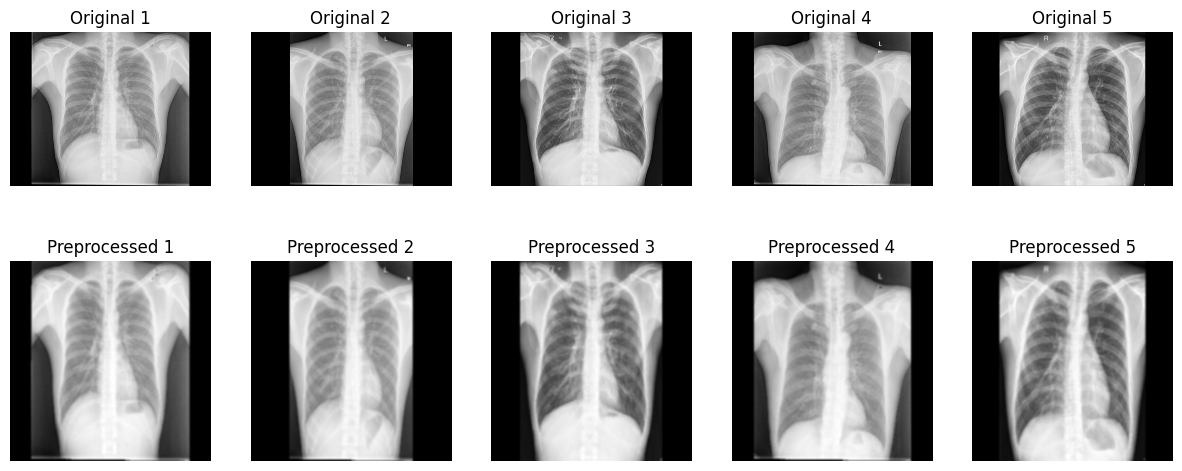

In [26]:
preprocessed_images = []
original_images = []
for i, image_name in enumerate(os.listdir(xray_images_dir)):
    if i >= 5:
        break

    image_path = os.path.join(xray_images_dir, image_name)

    original_images.append(plt.imread(image_path))

    preprocessed_image = preprocess_xray4(image_path)

    if preprocessed_image is not None:
        preprocessed_images.append(preprocessed_image)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))


for i in range(5):
    axs[0, i].imshow(original_images[i], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Original {i + 1}')


for i in range(5):
    axs[1, i].imshow(preprocessed_images[i], cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f'Preprocessed {i + 1}')

plt.show()

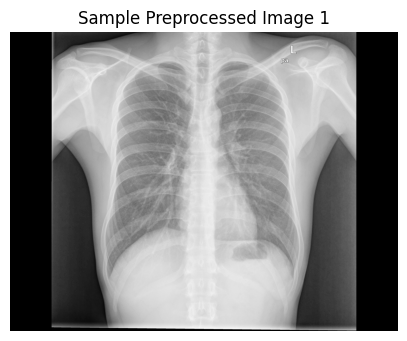

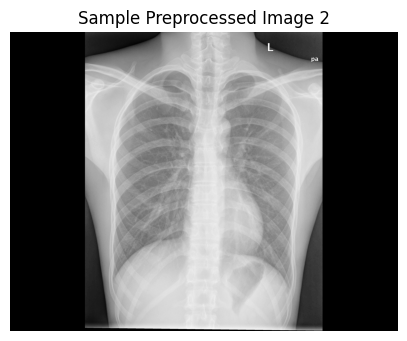

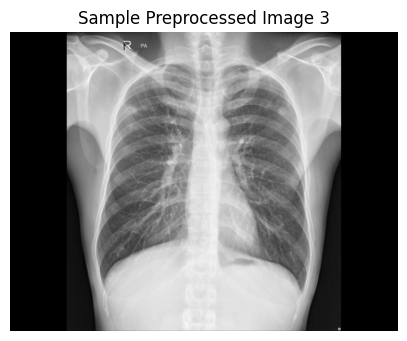

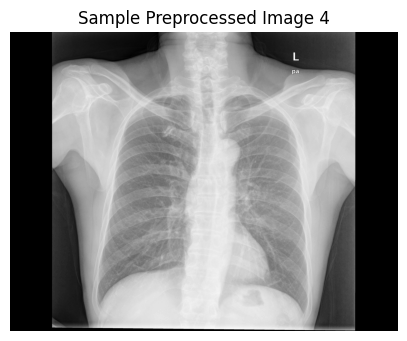

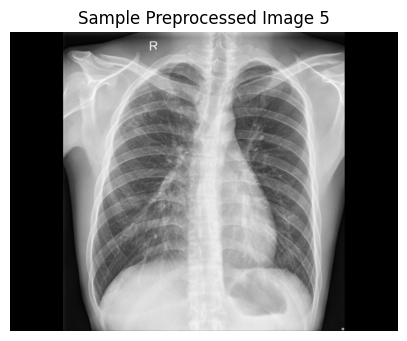

In [28]:
preprocessed_images = []


#for image_name in os.listdir(xray_images_dir):
    #image_path = os.path.join(xray_images_dir, image_name)


    #preprocessed_image = preprocess_xray4(image_path)
    #if preprocessed_image is not None:
        #preprocessed_images.append(preprocessed_image)

for i, img in enumerate(original_images[:5]):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(f"Sample Preprocessed Image {i+1}")
    plt.axis('off')
    plt.show()